In [1]:
# 1. Imports and data loading
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('data/Air_Quality_clean.csv', parse_dates=['start_date'])
df.head()


,unique_id,indicator_id,name,measure,measure_info,geo_type_name,geo_join_id,geo_place_name,time_period,start_date,data_value
0,131403,657,Asthma emergency department visits due to PM2.5,Estimated annual rate (age 18+),"per 100,000 adults",UHF42,503,Willowbrook,2009-2011,2009-01-01,16.00
1,334058,365,Fine particles (PM 2.5),Mean,mcg/m3,UHF42,408,Jamaica,Summer 2015,2015-06-01,9.08
2,336578,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,402,West Queens,Summer 2015,2015-06-01,16.30
3,670932,386,Ozone (O3),Mean,ppb,UHF34,202,Downtown - Heights - Slope,Summer 2020,2020-06-01,28.79
4,176013,375,Nitrogen dioxide (NO2),Mean,ppb,UHF42,202,Downtown - Heights - Slope,Summer 2012,2012-06-01,20.18


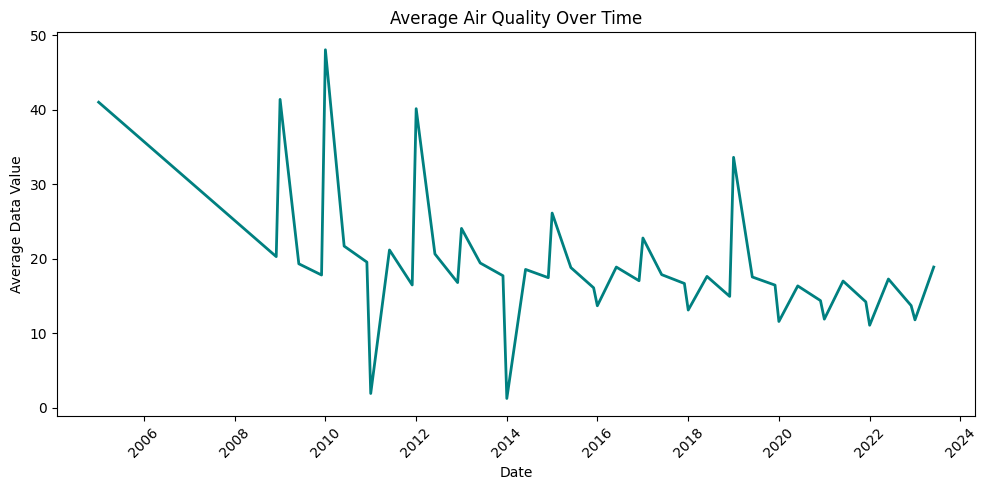

In [2]:
# 3. Time series of average measurements (with custom color)
df_time = (
    df
    .groupby('start_date')['data_value']
    .mean()
    .reset_index()
)

plt.figure(figsize=(10, 5))
sns.lineplot(
    x='start_date',
    y='data_value',
    data=df_time,
    color='teal',         # <-- changed color
    linewidth=2
)
plt.title('Average Air Quality Over Time')
plt.xlabel('Date')
plt.ylabel('Average Data Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



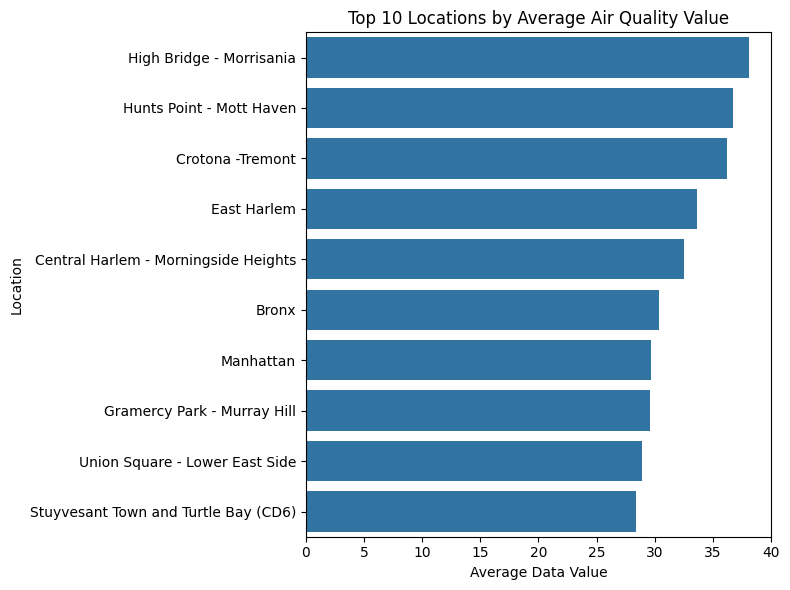

In [3]:
# 4. Top 10 locations by average measurement
top_locations = (
    df
    .groupby('geo_place_name')['data_value']
    .mean()
    .nlargest(10)
    .reset_index()
)
plt.figure(figsize=(8, 6))
sns.barplot(y='geo_place_name', x='data_value', data=top_locations)
plt.title('Top 10 Locations by Average Air Quality Value')
plt.xlabel('Average Data Value')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


C:\Users\vilas patel\AppData\Local\Temp\ipykernel_17824\3909484364.py:11: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(
C:\Users\vilas patel\AppData\Local\Temp\ipykernel_17824\3909484364.py:11: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.pointplot(


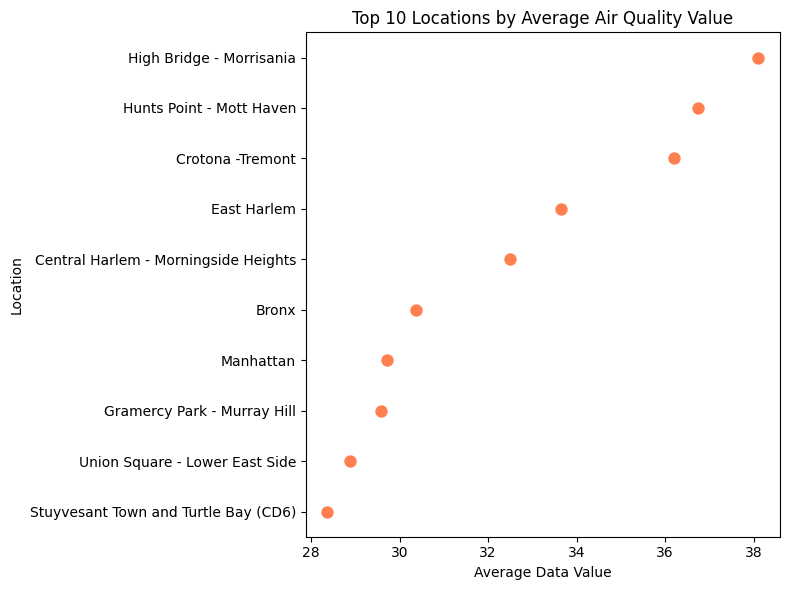

In [4]:
# 4. Top 10 locations by average measurement (using a point plot instead of bar)
top_locations = (
    df
    .groupby('geo_place_name')['data_value']
    .mean()
    .nlargest(10)
    .reset_index()
)

plt.figure(figsize=(8, 6))
sns.pointplot(
    x='data_value',
    y='geo_place_name',
    data=top_locations,
    join=False,
    color='coral',        # <-- custom color
    markers='o',
    scale=1.2
)
plt.title('Top 10 Locations by Average Air Quality Value')
plt.xlabel('Average Data Value')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


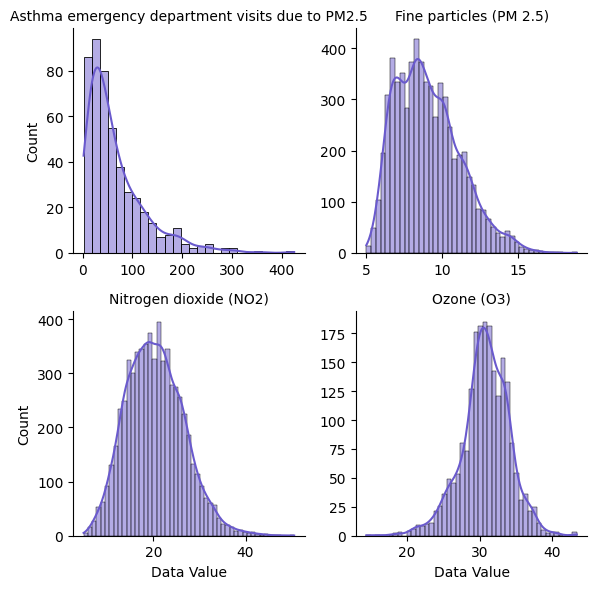

In [5]:
# 6. Pollutant‐specific distributions: facet histograms for the top 4 indicators
# (replace “name” with the actual pollutant column once loaded)
top_names = df['name'].value_counts().nlargest(4).index
df_top = df[df['name'].isin(top_names)]

g = sns.FacetGrid(
    df_top,
    col='name',
    col_wrap=2,
    sharex=False,
    sharey=False
)
g.map(
    sns.histplot,
    'data_value',
    kde=True,
    color='slateblue'      # custom color for all facets
)
g.set_titles('{col_name}')
g.set_axis_labels('Data Value', 'Count')
plt.tight_layout()
plt.show()
